In [1]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
from sklearn.cluster import KMeans

In [2]:
image_path = "..\\output_videos\\cropped_image.jpg"
image = cv2.imread(image_path)
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

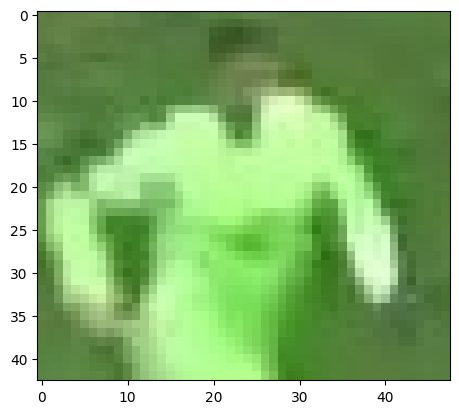

In [3]:
top_half = image[0:int(image.shape[0]/2),:]
plt.imshow(top_half)
plt.show()

c:\Users\tom\anaconda3\envs\soccerTracking\lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=9.
  warnings.warn(


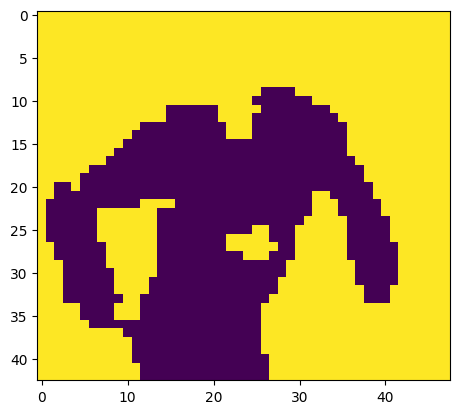

In [6]:
image_2d = top_half.reshape(-1,3)

kmeans = KMeans(n_clusters=2, random_state=0)
kmeans.fit(image_2d)

labels = kmeans.labels_

cluster_image = labels.reshape(top_half.shape[0], top_half.shape[1])

plt.imshow(cluster_image)
plt.show()

In [8]:
corner_cluster = [cluster_image[0,0], cluster_image[0,-1], cluster_image[-1,0], cluster_image[-1,-1]]
non_player_cluster = max(set(corner_cluster), key = corner_cluster.count)
player_cluster = 1-non_player_cluster
kmeans.cluster_centers_[player_cluster]

array([171.11330698, 235.40316206, 142.52700922])